In [1]:
import pycaret
pycaret.__version__

'3.2.0'

## Load Data

In [2]:
from pycaret.datasets import get_data
data = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Main

Setup ➡️ Compare Models ➡️ Analyze Model ➡️ Prediction

In [3]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

### Setup

In [4]:
exp.setup(data, target = 'species', session_id = 123)

,Description,Value
0,Session id,123
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


### Compare Models

In [5]:
exp.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [6]:
best = exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9718,0.9971,0.9718,0.9780,0.9712,0.9573,0.9609,0.5700
knn,K Neighbors Classifier,0.9718,0.9830,0.9718,0.9780,0.9712,0.9573,0.9609,0.5720
qda,Quadratic Discriminant Analysis,0.9718,0.9974,0.9718,0.9780,0.9712,0.9573,0.9609,0.0040
lda,Linear Discriminant Analysis,0.9718,1.0000,0.9718,0.9780,0.9712,0.9573,0.9609,0.0060
lightgbm,Light Gradient Boosting Machine,0.9536,0.9935,0.9536,0.9634,0.9528,0.9298,0.9356,0.0900
nb,Naive Bayes,0.9445,0.9868,0.9445,0.9525,0.9438,0.9161,0.9207,0.3610
et,Extra Trees Classifier,0.9445,0.9935,0.9445,0.9586,0.9426,0.9161,0.9246,0.0270
catboost,CatBoost Classifier,0.9445,0.9922,0.9445,0.9586,0.9426,0.9161,0.9246,0.1490
gbc,Gradient Boosting Classifier,0.9355,0.9792,0.9355,0.9416,0.9325,0.9023,0.9083,0.0250
dt,Decision Tree Classifier,0.9264,0.9429,0.9264,0.9502,0.9201,0.8886,0.9040,0.0050


In [7]:
best = exp.tune_model(best, search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,1.0000,0.9091,0.9273,0.9076,0.8625,0.8735
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9000,1.0000,0.9000,0.9250,0.8971,0.8485,0.8616
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


[I 2024-02-29 13:26:50,041] Searching the best hyperparameters using 105 samples...
[I 2024-02-29 13:26:52,275] Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Analyze Model

In [8]:
# exp.evaluate_model(best)

In [9]:
# help(exp.plot_model)

#### Setting

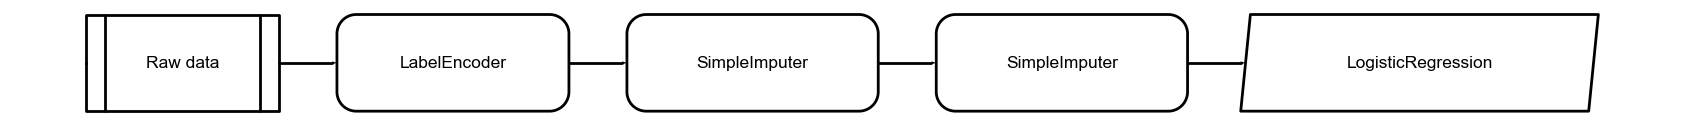

In [10]:
exp.plot_model(best, plot = 'pipeline')

In [11]:
exp.plot_model(best, plot = 'parameter')

,Parameters
C,1.0
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


#### Learning

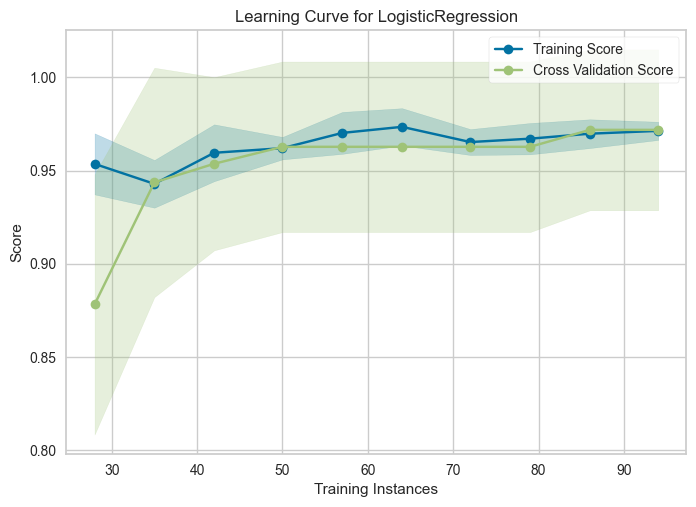

In [12]:
exp.plot_model(best, plot = 'learning')

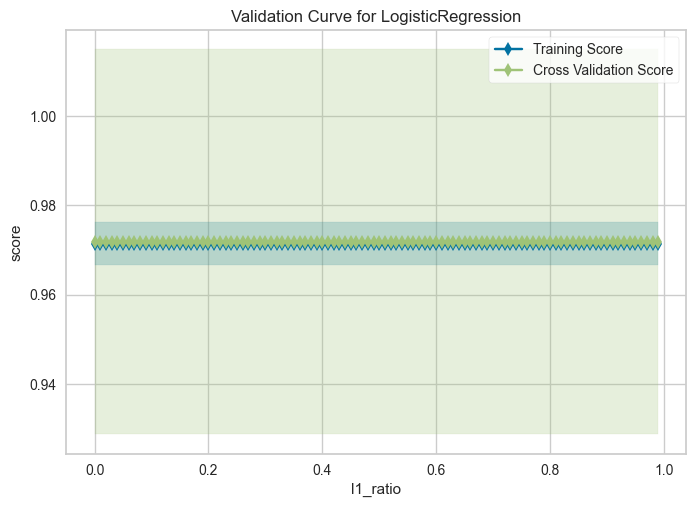

In [13]:
exp.plot_model(best, plot = 'vc')

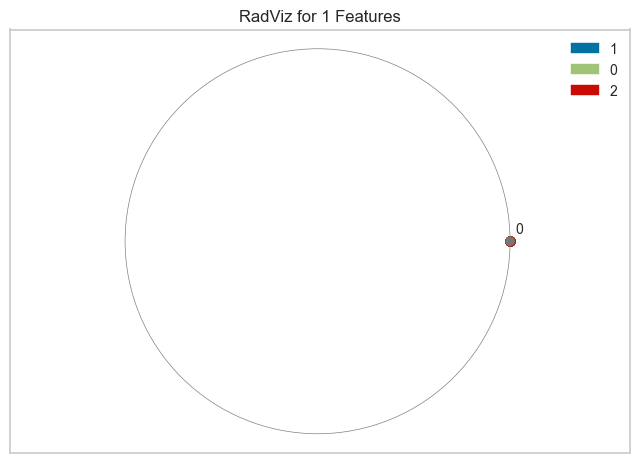

In [14]:
exp.plot_model(best, plot = 'dimension')

#### Model Evaluation

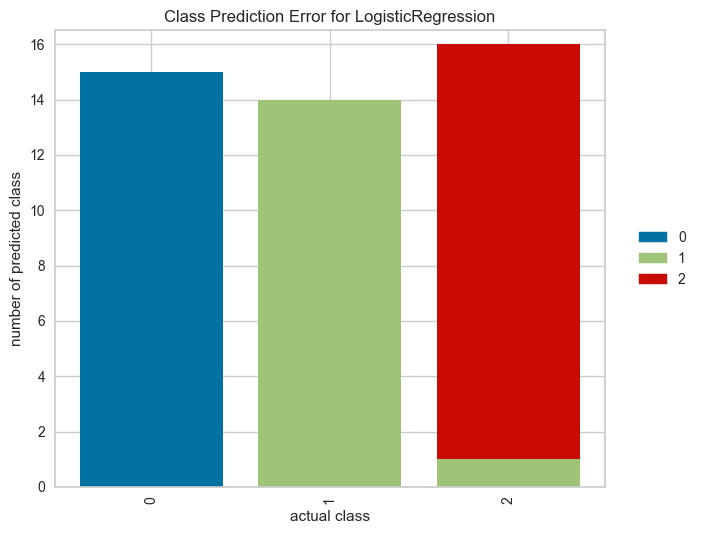

In [15]:
exp.plot_model(best, plot = 'error')

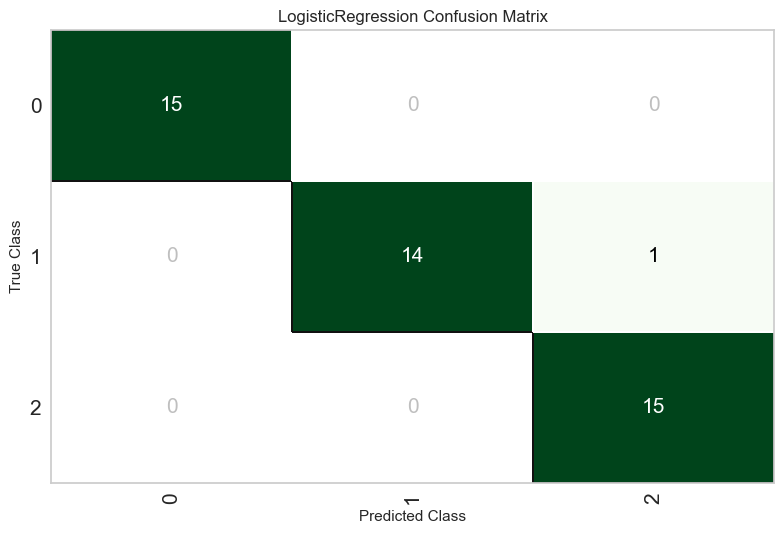

In [16]:
exp.plot_model(best, plot = 'confusion_matrix')

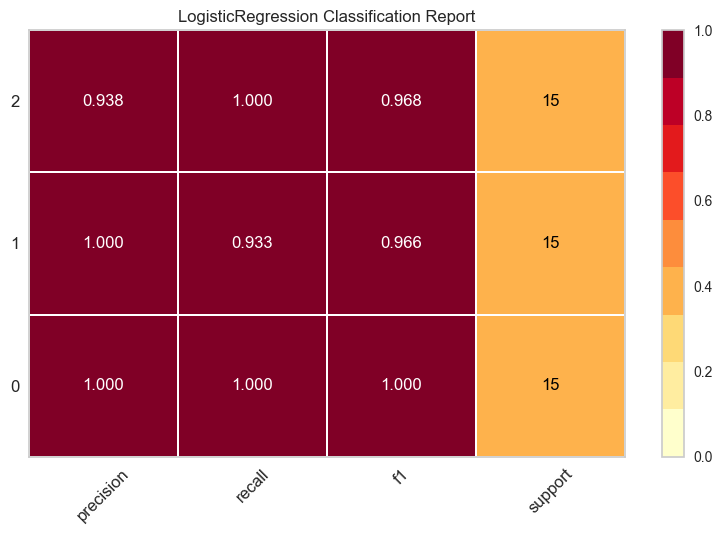

In [17]:
exp.plot_model(best, plot = 'class_report')

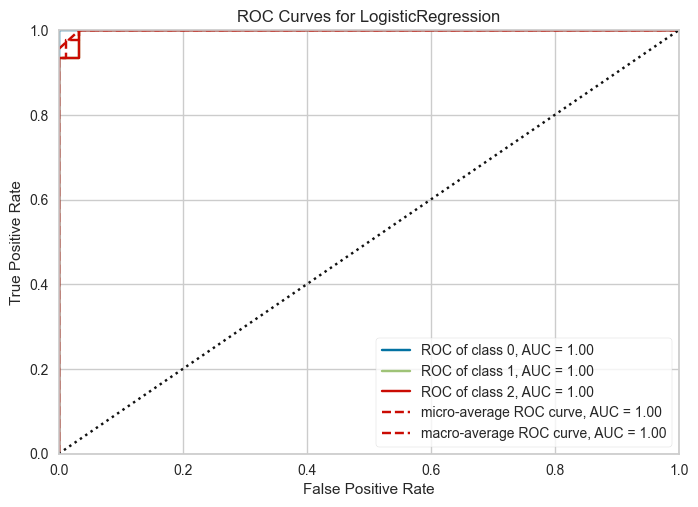

In [18]:
exp.plot_model(best, plot = 'auc')

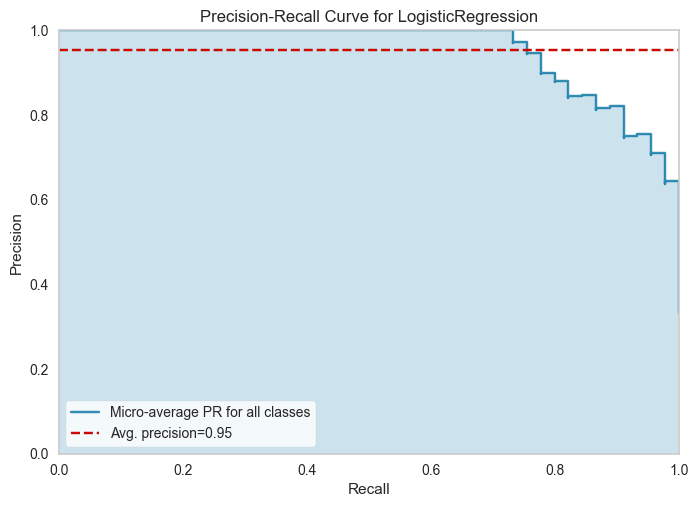

In [19]:
exp.plot_model(best, plot = 'pr')

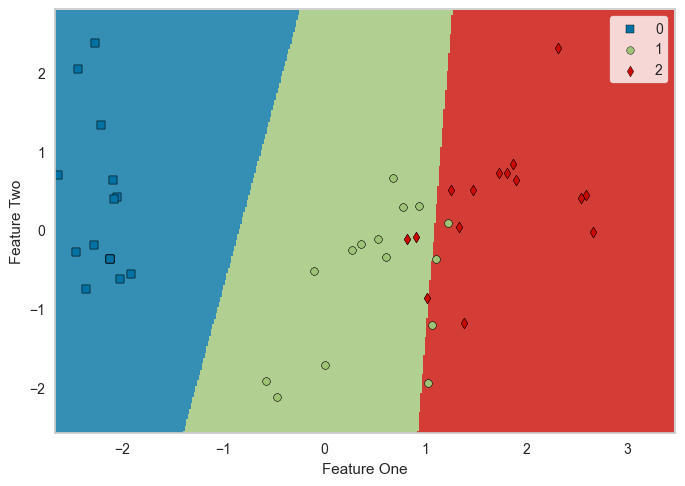

In [20]:
exp.plot_model(best, plot = 'boundary')

In [21]:
# exp.plot_model(best, plot = 'tree')

#### Features Evaluation

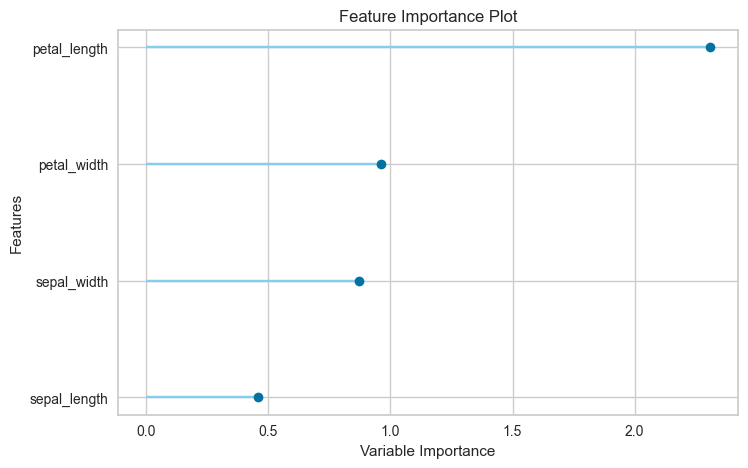

In [22]:
exp.plot_model(best, plot = 'feature')

## Prediction

In [23]:
holdout_pred = exp.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9778,0.9985,0.9778,0.9792,0.9778,0.9667,0.9674


In [24]:
holdout_pred.head()

,sepal_length,sepal_width,petal_length,petal_width,species,prediction_label,prediction_score
72,6.3,2.5,4.9,1.5,Iris-versicolor,Iris-versicolor,0.5204
125,7.2,3.2,6.0,1.8,Iris-virginica,Iris-virginica,0.9503
80,5.5,2.4,3.8,1.1,Iris-versicolor,Iris-versicolor,0.9334
86,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor,0.7321
117,7.7,3.8,6.7,2.2,Iris-virginica,Iris-virginica,0.9952


In [25]:
new_data = data.copy()
new_data.drop('species', axis=1, inplace=True)
new_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
new_data_pred = exp.predict_model(best, data = new_data)
new_data_pred.head()

,sepal_length,sepal_width,petal_length,petal_width,prediction_label,prediction_score
0,5.1,3.5,1.4,0.2,Iris-setosa,0.9775
1,4.9,3.0,1.4,0.2,Iris-setosa,0.9678
2,4.7,3.2,1.3,0.2,Iris-setosa,0.9820
3,4.6,3.1,1.5,0.2,Iris-setosa,0.9719
4,5.0,3.6,1.4,0.2,Iris-setosa,0.9813
